   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


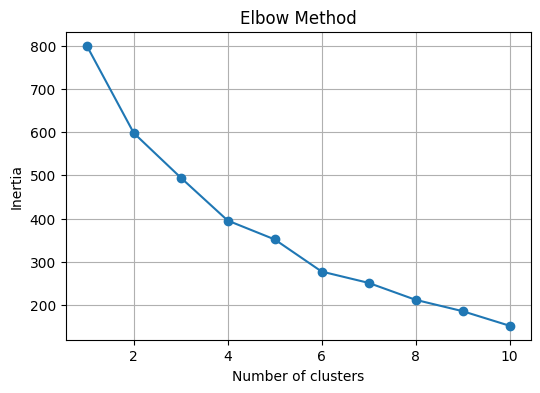

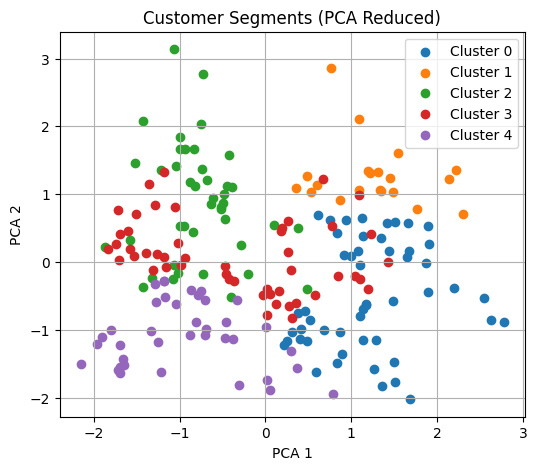

Silhouette Score for k=5: 0.2719


In [1]:
# Task 8: K-Means Clustering - Mall Customer Segmentation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display first few rows
print(df.head())

# Optional: Drop 'CustomerID' and convert 'Gender' to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 4. Train KMeans with optimal K (e.g., K=5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
df['Cluster'] = cluster_labels

# 5. Optional PCA for 2D Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(6, 5))
for i in range(k):
    plt.scatter(reduced_data[cluster_labels == i, 0],
                reduced_data[cluster_labels == i, 1],
                label=f'Cluster {i}')
plt.title('Customer Segments (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

# 6. Evaluate clustering with Silhouette Score
score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score for k={k}: {score:.4f}")
